In [1]:
import pandas as pd      
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

from scipy.stats import skew

from sklearn.model_selection import cross_validate
import warnings
warnings.filterwarnings('ignore')
plt.rcParams["figure.figsize"] = (7,4)
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

In [2]:
Audi_A1_listings = pd.read_csv("Audi_A1_listings.csv")
df = Audi_A1_listings.copy()
df.head(5)

,index,Year,Type,Mileage(miles),Engine,PS,Transmission,Fuel,Number_of_Owners,Price(£),href,PPY,MileageRank,PriceRank,PPYRank,Score
0,0,2018.0,Hatchback,44000.0,1.6L,114.398422,Manual,Diesel,1,14995.0,https://www.autotrader.co.uk/car-details/20221...,2499.166667,215,163,340,718
1,4,2016.0,Hatchback,42596.0,1.0L,93.688363,Manual,Petrol,3,10755.0,https://www.autotrader.co.uk/car-details/20221...,2688.750000,222,330,276,828
2,7,2015.0,Hatchback,42700.0,1.4L,123.274162,Manual,Petrol,2,10799.0,https://www.autotrader.co.uk/car-details/20221...,3599.666667,221,327,94,642
3,11,2014.0,Hatchback,86000.0,1.6L,103.550296,Manual,Diesel,3,7490.0,https://www.autotrader.co.uk/car-details/20221...,3745.000000,41,449,83,573
4,12,2014.0,Hatchback,104310.0,1.6L,103.550296,Manual,Diesel,3,7400.0,https://www.autotrader.co.uk/car-details/20220...,3700.000000,12,452,85,549


Year: Araç modelinin üretildiği yıl.

Type: Araç tipi veya modeli.

Mileage(miles): Araç üzerindeki mil cinsinden mesafe veya kullanım ölçüsü.

Engine: Araç motorunun özellikleri.

PS: Araç motorunun gücü, PS (Pferdestärke) cinsinden ifade edilir.

Transmission: Araç vites tipi veya şanzıman türü.

Fuel: Araçta kullanılan yakıt türü.

Number_of_Owners: Araçtaki sahiplerin sayısı.

Price(£): Araç fiyatı, İngiliz Sterlini (£) cinsinden.

href: Veri ile ilişkilendirilmiş bir bağlantı veya referans.

PPY: "Price per Year" olarak adlandırılabilir. Yıllık fiyat üzerinden bir performans metriği.

MileageRank: Araçların mil cinsinden mesafelerine göre sıralandığı bir sıralama.

PriceRank: Araçların fiyatlarına göre sıralandığı bir sıralama.

PPYRank: "Price per Year" değerine göre sıralandığı bir sıralama.

Score: Araçların genel performans skoru veya değeri.

## EDA

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 471 entries, 0 to 470
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   index             471 non-null    int64  
 1   Year              471 non-null    float64
 2   Type              471 non-null    object 
 3   Mileage(miles)    471 non-null    float64
 4   Engine            471 non-null    object 
 5   PS                471 non-null    float64
 6   Transmission      471 non-null    object 
 7   Fuel              471 non-null    object 
 8   Number_of_Owners  471 non-null    int64  
 9   Price(£)          471 non-null    float64
 10  href              471 non-null    object 
 11  PPY               471 non-null    float64
 12  MileageRank       471 non-null    int64  
 13  PriceRank         471 non-null    int64  
 14  PPYRank           471 non-null    int64  
 15  Score             471 non-null    int64  
dtypes: float64(5), int64(6), object(5)
memory us

In [4]:
df.isnull().sum()[df.isnull().sum()>0]

Series([], dtype: int64)

In [5]:
df.duplicated().sum()

0

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
index,471.0,514.104034,280.877333,0.000000,280.000000,519.000000,754.500000,990.000000
Year,471.0,2016.970276,2.208101,2014.000000,2015.000000,2017.000000,2019.000000,2022.000000
Mileage(miles),471.0,44892.783439,27020.236124,9.000000,24902.000000,40236.000000,61770.500000,149000.000000
PS,471.0,116.682559,17.345034,84.812623,103.550296,114.398422,123.274162,197.238659
Number_of_Owners,471.0,1.785563,0.886473,1.000000,1.000000,2.000000,2.000000,7.000000
Price(£),471.0,13935.070064,4955.040914,5000.000000,10286.500000,12495.000000,17495.000000,30450.000000
PPY,471.0,3048.577682,896.647265,1682.333333,2481.666667,2800.000000,3342.400000,7375.000000
MileageRank,471.0,235.000000,136.110249,0.000000,117.500000,235.000000,352.500000,470.000000
PriceRank,471.0,235.000000,136.110249,0.000000,117.500000,235.000000,352.500000,470.000000
PPYRank,471.0,235.000000,136.110249,0.000000,117.500000,235.000000,352.500000,470.000000


Text(0.5, 1.0, 'Year Distribution')

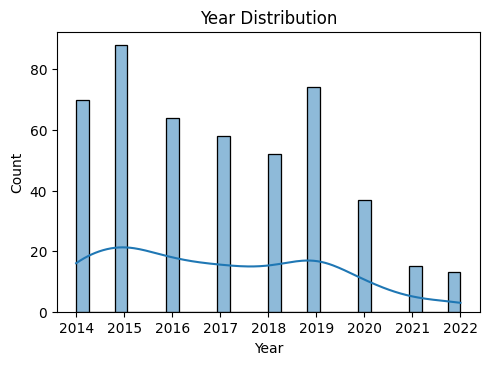

In [7]:
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
sns.histplot(df['Year'], bins=30, kde=True)
plt.title('Year Distribution')

Text(0.5, 1.0, 'Mileage Distribution')

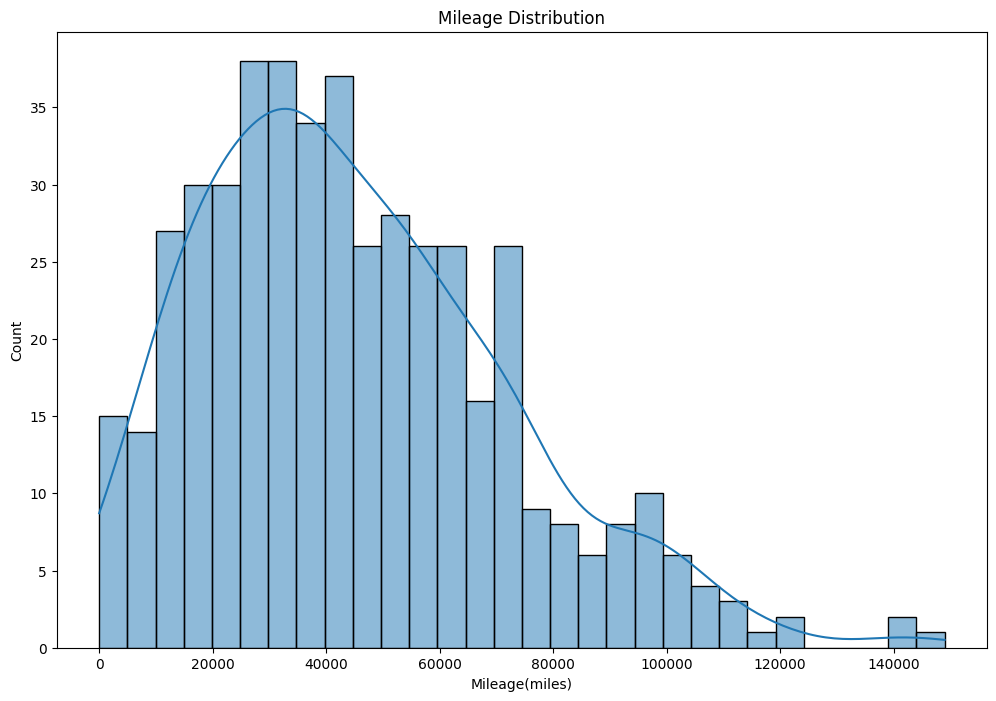

In [8]:
plt.figure(figsize=(12, 8))
sns.histplot(df['Mileage(miles)'], bins=30, kde=True)
plt.title('Mileage Distribution')


Text(0.5, 1.0, 'PS Distribution')

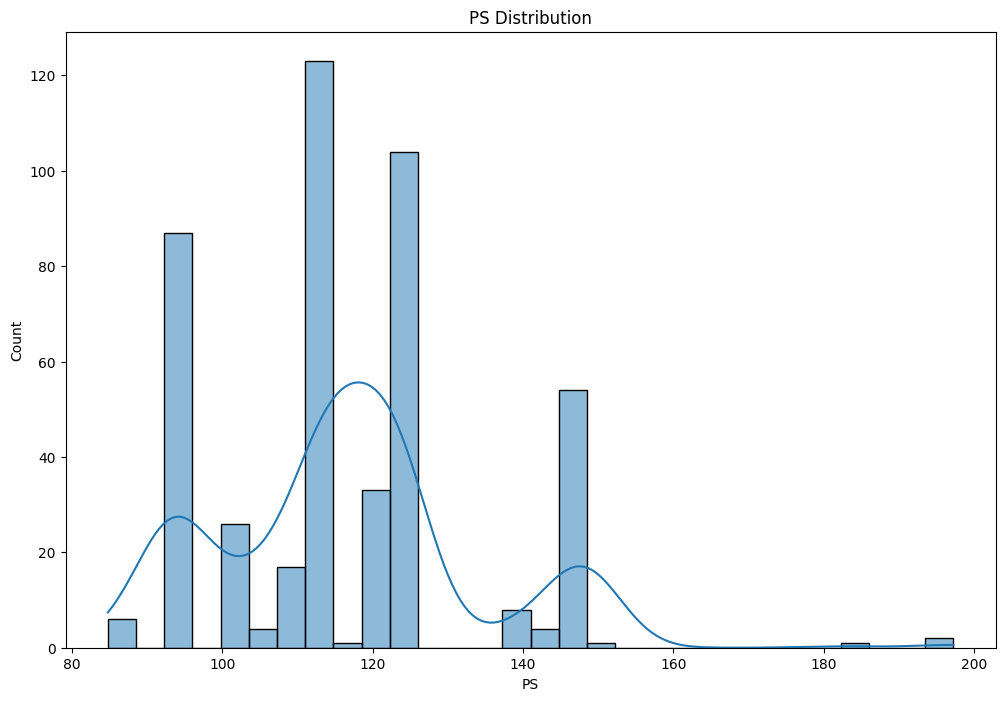

In [9]:
plt.figure(figsize=(12, 8))

sns.histplot(df['PS'], bins=30, kde=True)
plt.title('PS Distribution')

Text(0.5, 1.0, 'Price Distribution')

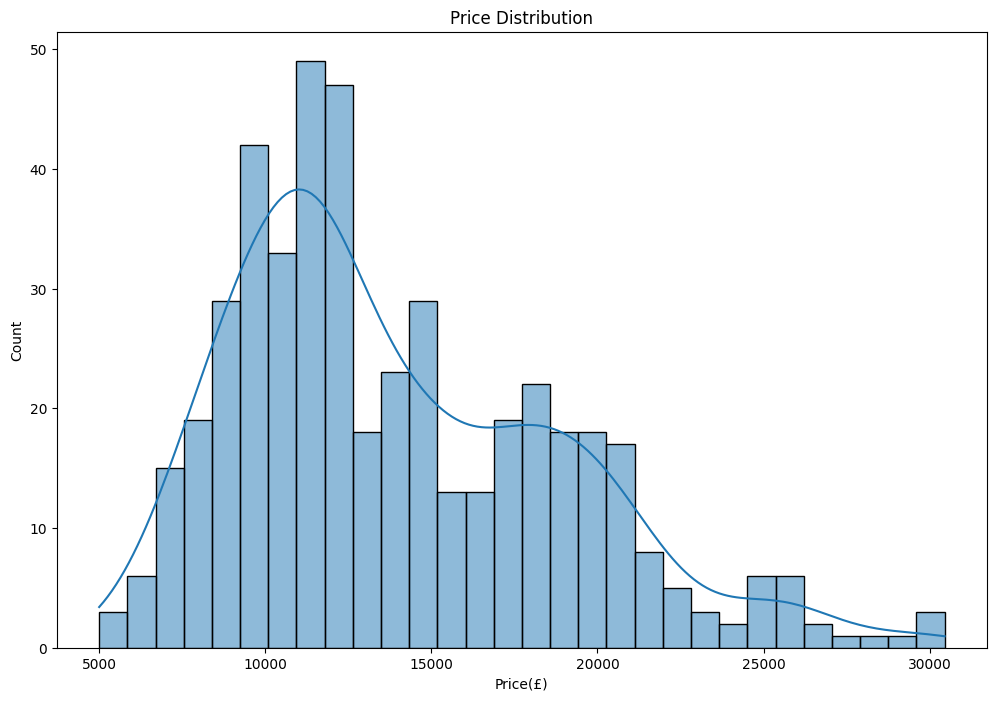

In [10]:
plt.figure(figsize=(12, 8))
sns.histplot(df['Price(£)'], bins=30, kde=True)
plt.title('Price Distribution')


Text(0.5, 1.0, 'Fuel Count')

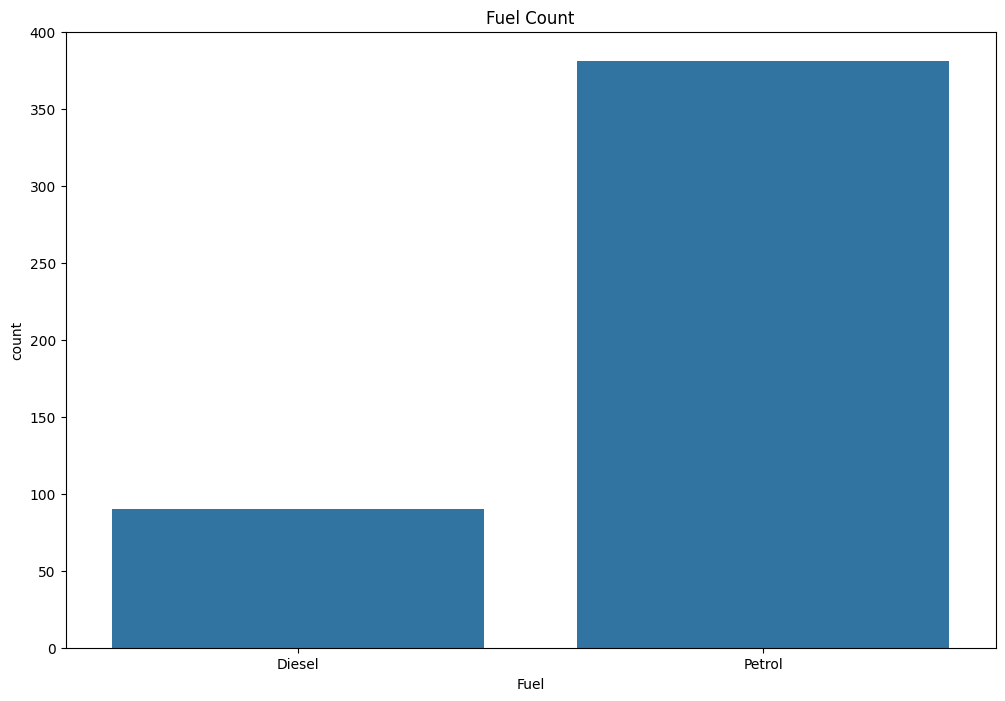

In [11]:
plt.figure(figsize=(12, 8))
sns.countplot(x='Fuel', data=df)
plt.title('Fuel Count')

Text(0.5, 1.0, 'PPY Distribution')

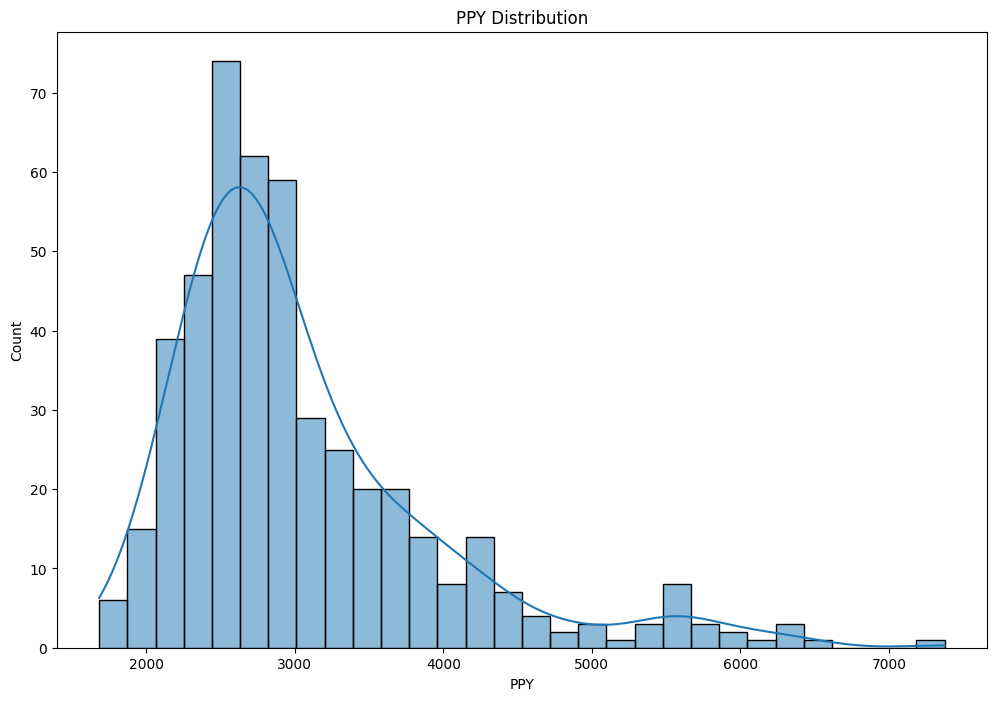

In [12]:
plt.figure(figsize=(12, 8))
sns.histplot(df['PPY'], bins=30, kde=True)
plt.title('PPY Distribution')

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 471 entries, 0 to 470
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   index             471 non-null    int64  
 1   Year              471 non-null    float64
 2   Type              471 non-null    object 
 3   Mileage(miles)    471 non-null    float64
 4   Engine            471 non-null    object 
 5   PS                471 non-null    float64
 6   Transmission      471 non-null    object 
 7   Fuel              471 non-null    object 
 8   Number_of_Owners  471 non-null    int64  
 9   Price(£)          471 non-null    float64
 10  href              471 non-null    object 
 11  PPY               471 non-null    float64
 12  MileageRank       471 non-null    int64  
 13  PriceRank         471 non-null    int64  
 14  PPYRank           471 non-null    int64  
 15  Score             471 non-null    int64  
dtypes: float64(5), int64(6), object(5)
memory us

In [14]:
df.sample(1)

,index,Year,Type,Mileage(miles),Engine,PS,Transmission,Fuel,Number_of_Owners,Price(£),href,PPY,MileageRank,PriceRank,PPYRank,Score
254,552,2014.0,Hatchback,116100.0,1.6L,103.0,Manual,Diesel,2,6795.0,https://www.autotrader.co.uk/car-details/20221...,3397.5,5,461,113,579


In [15]:
df["href"].unique()

array(['https://www.autotrader.co.uk/car-details/202212122461540?year-to=2022&year-from=2012&include-delivery-option=on&make=Audi&radius=1500&model=A1&onesearchad=New&onesearchad=Nearly%20New&onesearchad=Used&advertising-location=at_cars&postcode=br49jd&sort=relevance&exclude-writeoff-categories=on&page=1&percentVehiclePriceDeposit=true',
       'https://www.autotrader.co.uk/car-details/202210090558995?year-to=2022&year-from=2012&include-delivery-option=on&make=Audi&radius=1500&model=A1&onesearchad=New&onesearchad=Nearly%20New&onesearchad=Used&advertising-location=at_cars&postcode=br49jd&sort=relevance&exclude-writeoff-categories=on&page=1&percentVehiclePriceDeposit=true',
       'https://www.autotrader.co.uk/car-details/202212152544160?year-to=2022&year-from=2012&include-delivery-option=on&make=Audi&radius=1500&model=A1&onesearchad=New&onesearchad=Nearly%20New&onesearchad=Used&advertising-location=at_cars&postcode=br49jd&sort=relevance&exclude-writeoff-categories=on&page=1&percentVehi

In [16]:
df["index"].unique()

array([  0,   4,   7,  11,  12,  15,  18,  25,  28,  30,  32,  37,  40,
        42,  43,  44,  46,  47,  48,  50,  53,  56,  57,  58,  60,  61,
        62,  64,  65,  66,  72,  74,  75,  79,  84,  95,  96,  99, 101,
       103, 104, 108, 109, 110, 118, 119, 121, 122, 126, 136, 137, 138,
       145, 150, 151, 152, 156, 158, 159, 160, 163, 165, 167, 168, 169,
       171, 174, 175, 178, 179, 181, 183, 184, 186, 189, 190, 192, 194,
       196, 198, 203, 204, 205, 208, 211, 212, 213, 216, 221, 222, 224,
       225, 227, 228, 230, 231, 232, 234, 235, 237, 240, 241, 242, 245,
       246, 253, 254, 259, 260, 261, 262, 265, 266, 267, 270, 273, 276,
       279, 281, 282, 283, 287, 289, 292, 295, 296, 299, 301, 303, 304,
       305, 306, 307, 308, 311, 313, 314, 315, 317, 319, 320, 321, 324,
       325, 331, 332, 333, 334, 339, 340, 342, 344, 345, 346, 347, 348,
       349, 351, 352, 354, 355, 356, 359, 363, 366, 370, 371, 372, 373,
       374, 376, 379, 382, 383, 384, 386, 388, 391, 392, 393, 39

In [17]:
df["Type"].unique()

array(['Hatchback'], dtype=object)

In [18]:
df = df.drop(columns=["index","href","Type"])

In [19]:
df["Engine"].unique()

array(['1.6L', '1.0L', '1.4L', '1.2L', '1.5L', '2.0L'], dtype=object)

In [20]:
df["Engine"] = df["Engine"].str.replace("L","")

In [21]:
df["Engine"].unique()

array(['1.6', '1.0', '1.4', '1.2', '1.5', '2.0'], dtype=object)

In [22]:
df["Engine"] = pd.to_numeric(df["Engine"])

In [23]:
df["Transmission"].unique()

array(['Manual', 'Automatic'], dtype=object)

In [24]:
df["Fuel"].unique()

array(['Diesel', 'Petrol'], dtype=object)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 471 entries, 0 to 470
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Year              471 non-null    float64
 1   Mileage(miles)    471 non-null    float64
 2   Engine            471 non-null    float64
 3   PS                471 non-null    float64
 4   Transmission      471 non-null    object 
 5   Fuel              471 non-null    object 
 6   Number_of_Owners  471 non-null    int64  
 7   Price(£)          471 non-null    float64
 8   PPY               471 non-null    float64
 9   MileageRank       471 non-null    int64  
 10  PriceRank         471 non-null    int64  
 11  PPYRank           471 non-null    int64  
 12  Score             471 non-null    int64  
dtypes: float64(6), int64(5), object(2)
memory usage: 48.0+ KB


## Label Encoding

In [26]:
from sklearn.preprocessing import LabelEncoder

In [27]:
label_encoder_transmission = LabelEncoder()
df["Transmission"] = label_encoder_transmission.fit_transform(df["Transmission"])

In [28]:
label_encoder_fuel = LabelEncoder()
df["Fuel"] = label_encoder_fuel.fit_transform(df["Fuel"])

In [29]:
df.sample(3)

,Year,Mileage(miles),Engine,PS,Transmission,Fuel,Number_of_Owners,Price(£),PPY,MileageRank,PriceRank,PPYRank,Score
466,2014.0,40195.0,1.4,138.067061,0,1,3,11275.0,5637.500000,236,302,12,550
451,2019.0,28000.0,1.0,114.398422,0,1,1,19143.0,2734.714286,330,75,259,664
469,2020.0,9584.0,1.0,93.688363,1,1,1,19970.0,2496.250000,444,64,346,854


In [30]:
df.columns

Index(['Year', 'Mileage(miles)', 'Engine', 'PS', 'Transmission', 'Fuel',
       'Number_of_Owners', 'Price(£)', 'PPY', 'MileageRank', 'PriceRank',
       'PPYRank', 'Score'],
      dtype='object')

In [31]:
yeni_isimler = ['Yil', 'Kilometre', 'Motor', 'Güç', 'Şanziman', 'Yakit',
                'Sahip_Sayisi', 'Fiyat', 'PPY', 'Kilometre_Siralama', 'Fiyat_Siralama',
                'PPY_Siralama', 'Puan']

df.columns = yeni_isimler

In [32]:
df.sample(1)

,Yil,Kilometre,Motor,Güç,Şanziman,Yakit,Sahip_Sayisi,Fiyat,PPY,Kilometre_Siralama,Fiyat_Siralama,PPY_Siralama,Puan
107,2015.0,63107.0,1.4,123.274162,1,1,2,10000.0,3333.333333,107,357,120,584


In [33]:
df = df[[col for col in df.columns if col != 'Fiyat'] + ['Fiyat']]

In [34]:
df.sample(1)

,Yil,Kilometre,Motor,Güç,Şanziman,Yakit,Sahip_Sayisi,PPY,Kilometre_Siralama,Fiyat_Siralama,PPY_Siralama,Puan,Fiyat
83,2019.0,29000.0,1.0,114.398422,0,1,2,2712.857143,322,82,268,672,18990.0


## Linear Regression

In [35]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


In [36]:
X = df.drop('Fiyat', axis=1)
y = df['Fiyat']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Çoklu Doğrusal Regresyon modeli oluşturma
model = LinearRegression()


In [37]:
model.fit(X_train, y_train)

LinearRegression()

In [38]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [39]:
model.coef_

array([ 2.37619763e+03,  1.41273161e-02, -2.01413029e+02,  9.76465009e+00,
       -4.07099804e+02, -1.54103869e+02, -4.00193475e-01,  6.63704060e-01,
        7.27651647e+00, -8.34208530e-01, -9.85276575e+00, -3.41045782e+00])

In [40]:
model.intercept_

-4778668.744542053

In [41]:
model.score(X_train,y_train)

0.9887693369423122

## Predicting Test Data

In [42]:
y_train_pred = model.predict(X_train)
y_pred = model.predict(X_test)

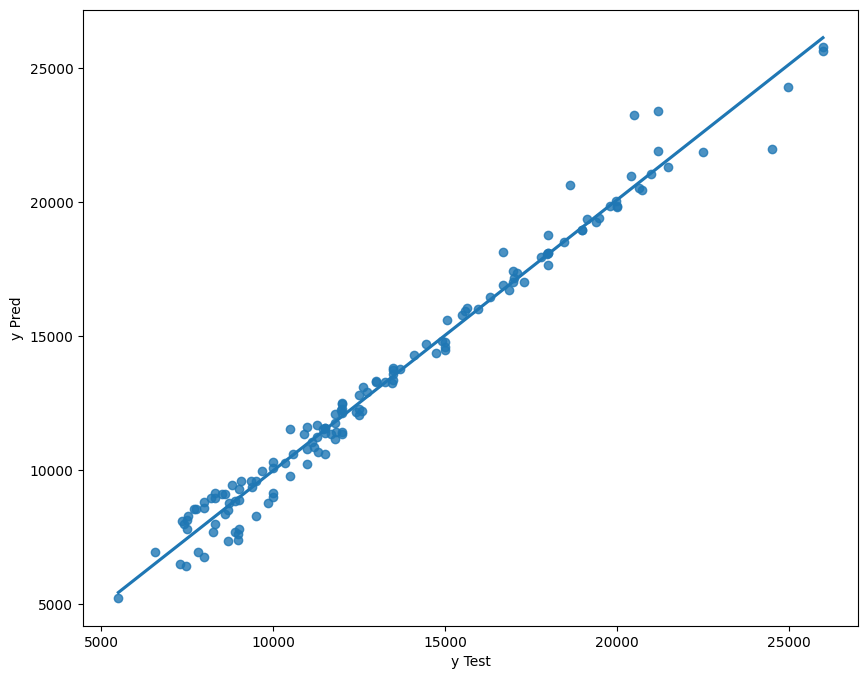

In [43]:
plt.figure(figsize=(10,8))

sns.regplot(x=y_test, y=y_pred, ci=None,)

plt.xlabel('y Test')
plt.ylabel('y Pred')

plt.show()


## Evaluating the Model


In [44]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
def train_val(y_train, y_train_pred, y_test, y_pred, model_name):
    
    scores = {model_name+"_train": {"R2" : r2_score(y_train, y_train_pred),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),                          
    "rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred))},
    
    model_name+"_test": {"R2" : r2_score(y_test, y_pred),
    "mae" : mean_absolute_error(y_test, y_pred),
    "mse" : mean_squared_error(y_test, y_pred),
    "rmse" : np.sqrt(mean_squared_error(y_test, y_pred))}}
    
    return pd.DataFrame(scores)

# tüm regression metriclerimizi birarada görmek için yukarıdaki fonksiyonu tanımlıyoruz.

slr_score = train_val(y_train, y_train_pred, y_test, y_pred, "s_linear")
slr_score 


,s_linear_train,s_linear_test
R2,0.988769,0.979090
mae,379.985348,470.377105
mse,287112.527709,445377.900323
rmse,535.828823,667.366391


In [45]:
df.sample(1)

,Yil,Kilometre,Motor,Güç,Şanziman,Yakit,Sahip_Sayisi,PPY,Kilometre_Siralama,Fiyat_Siralama,PPY_Siralama,Puan,Fiyat
227,2017.0,74820.0,1.4,123.274162,1,1,1,1850.0,59,398,466,923,9250.0


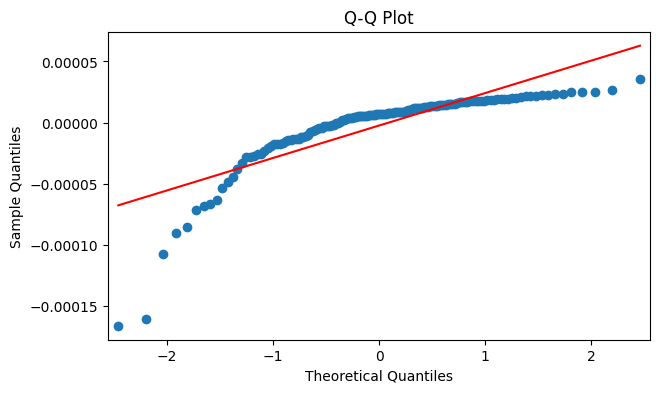

In [55]:
import statsmodels.api as sm
sm.qqplot(residuals, line='r')
plt.title('Q-Q Plot')
plt.show()

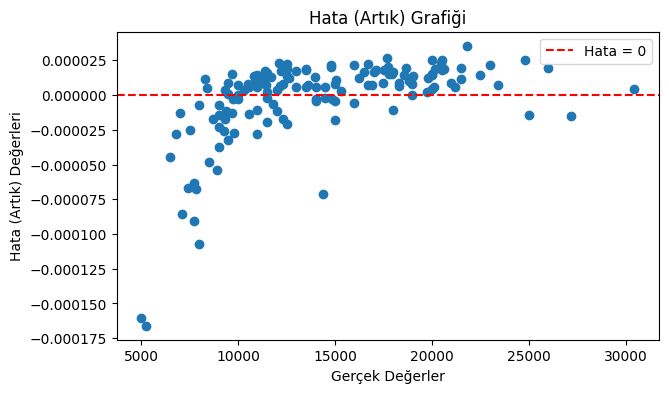

In [57]:
plt.scatter(y_test, residuals)
plt.axhline(y=0, color='r', linestyle='--', label='Hata = 0')
plt.xlabel('Gerçek Değerler')
plt.ylabel('Hata (Artık) Değerleri')
plt.title('Hata (Artık) Grafiği')
plt.legend()
plt.show()